<a href="https://colab.research.google.com/github/sboonpan/AI-Project-Algorithmic-Trading-Forex/blob/main/AI_DMLP_XAUUSD_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ta

# **Data Preparetion**

In [ ]:
import glob
import pandas as pd
from  google.colab import drive 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12.0, 8.0)

import warnings
warnings.simplefilter("ignore")

## **Import raw data form G-Drive**

In [ ]:
drive.mount('/gdrive')
file_path = glob.glob("/gdrive/My Drive/Data/Forex/XAUUSD1h2001-2021.csv") 
for file in file_path:
  df = pd.read_csv(file)
df.loc[:,'DateTime'] = pd.to_datetime(df.Date.astype(str)+' '+df.Timestamp.astype(str))
df.drop(columns = ['Date','Timestamp'], inplace = True)
df.set_index('DateTime', inplace = True)
df


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


,Open,High,Low,Close,Volume
DateTime,,,,,
2003-05-05 03:00:00,340.345,340.843,339.810,340.036,0.080440
2003-05-05 04:00:00,340.461,341.255,339.955,339.987,0.067130
2003-05-05 05:00:00,340.134,340.472,339.813,339.989,0.048170
2003-05-05 06:00:00,340.347,340.549,339.842,340.009,0.088770
2003-05-05 07:00:00,340.221,340.604,339.734,340.231,0.103181
...,...,...,...,...,...
2021-12-31 19:00:00,1825.184,1827.318,1824.878,1826.444,2.480120
2021-12-31 20:00:00,1826.454,1828.498,1824.588,1828.244,1.832590
2021-12-31 21:00:00,1828.368,1828.778,1827.058,1827.208,0.574680


## **Import raw data form GitHub**

In [ ]:
#path = 'https://raw.githubusercontent.com/sboonpan/Project_Time-Series/main/SET.csv'
#df = pd.read_csv(path)
#df.loc[:,'Date'] = pd.to_datetime(df.Date)
#df.set_index('Date', inplace = True)
#df.drop(columns = ['Date'], inplace = True)
#df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113696 entries, 2003-05-05 03:00:00 to 2021-12-31 23:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Open    113696 non-null  float64
 1   High    113696 non-null  float64
 2   Low     113696 non-null  float64
 3   Close   113696 non-null  float64
 4   Volume  113696 non-null  float64
dtypes: float64(5)
memory usage: 5.2 MB


# **Data Engineering**

In [ ]:
condition_1 = df['Volume'] != 0
df = df[ condition_1 ]
df

,Open,High,Low,Close,Volume
DateTime,,,,,
2003-05-05 03:00:00,340.345,340.843,339.810,340.036,0.080440
2003-05-05 04:00:00,340.461,341.255,339.955,339.987,0.067130
2003-05-05 05:00:00,340.134,340.472,339.813,339.989,0.048170
2003-05-05 06:00:00,340.347,340.549,339.842,340.009,0.088770
2003-05-05 07:00:00,340.221,340.604,339.734,340.231,0.103181
...,...,...,...,...,...
2021-12-31 19:00:00,1825.184,1827.318,1824.878,1826.444,2.480120
2021-12-31 20:00:00,1826.454,1828.498,1824.588,1828.244,1.832590
2021-12-31 21:00:00,1828.368,1828.778,1827.058,1827.208,0.574680


In [ ]:
#condition_2 =  df['High'] != df['Low']
#df = df[ condition_2 ]
#df

In [ ]:
df.resample(rule = 'A').mean()

,Open,High,Low,Close,Volume
DateTime,,,,,
2003-12-31,372.723475,373.387144,372.071905,372.755677,0.359461
2004-12-31,409.078926,409.833781,408.268275,409.108294,0.599974
2005-12-31,444.444854,445.216954,443.618015,444.498744,0.858826
2006-12-31,603.604954,605.009248,602.233778,603.671957,1.049211
2007-12-31,696.128375,697.229268,694.987328,696.162272,0.441314
2008-12-31,871.674444,873.812566,869.453021,871.676930,0.312585
2009-12-31,972.911670,974.610540,971.127953,972.974182,0.343081
2010-12-31,1226.134034,1227.828802,1224.351708,1226.206564,1.107956
2011-12-31,1572.249585,1574.880350,1569.504531,1572.285751,1.455047


In [ ]:
df.pct_change().resample(rule = 'A').std()

,Open,High,Low,Close,Volume
DateTime,,,,,
2003-12-31,0.002043,0.001826,0.001883,0.002065,4.699734
2004-12-31,0.002074,0.001800,0.001858,0.002074,1.200812
2005-12-31,0.001733,0.001459,0.001475,0.001762,0.715025
2006-12-31,0.002933,0.002535,0.002698,0.002941,0.306467
2007-12-31,0.002114,0.001844,0.001916,0.002112,0.286666
2008-12-31,0.004112,0.003700,0.003875,0.004117,0.267575
2009-12-31,0.002726,0.002406,0.002541,0.002719,0.311811
2010-12-31,0.002101,0.001858,0.001938,0.002100,0.511990
2011-12-31,0.002593,0.002246,0.002519,0.002591,37.954203


## **CUSUM Sampling**

In [ ]:
threshlod_cusum = df.pct_change().resample(rule = 'A').std().Close.min()
threshlod_cusum = threshlod_cusum 
threshlod_cusum

0.0012532233350316595

In [ ]:
def cusum_filter(series, threshold, ingredient='ret'):
    t_events = []
    if ingredient == 'ret':
        returns = series.pct_change()
    elif ingredient == 'log_ret':
        returns = series.apply(np.log).diff()
    returns = returns.iloc[1:]        # remove first nan
    sum_pos = 0
    sum_neg = 0
    for index, ret in returns.items():
        sum_pos += max(sum_pos + ret, 0)
        sum_neg += max(sum_neg - ret, 0)
        
        if sum_pos > threshold:
            t_events.append(index)
            sum_pos = 0

        if sum_neg > threshold:
            t_events.append(index)
            sum_neg = 0
        
    return pd.DatetimeIndex(t_events)

In [ ]:
t_events = cusum_filter(df['Close'], threshlod_cusum, ingredient='log_ret')
t_events

DatetimeIndex(['2003-05-05 08:00:00', '2003-05-05 09:00:00',
               '2003-05-05 11:00:00', '2003-05-05 12:00:00',
               '2003-05-05 16:00:00', '2003-05-05 16:00:00',
               '2003-05-05 19:00:00', '2003-05-05 20:00:00',
               '2003-05-05 22:00:00', '2003-05-06 00:00:00',
               ...
               '2021-12-31 07:00:00', '2021-12-31 09:00:00',
               '2021-12-31 10:00:00', '2021-12-31 13:00:00',
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 17:00:00', '2021-12-31 18:00:00',
               '2021-12-31 20:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', length=68740, freq=None)

In [ ]:
sampling = df.loc[t_events]
sampling

,Open,High,Low,Close,Volume
DateTime,,,,,
2003-05-05 08:00:00,340.286,340.563,339.828,339.911,0.089100
2003-05-05 09:00:00,340.429,340.538,339.849,340.092,0.086730
2003-05-05 11:00:00,339.748,341.106,339.748,340.608,0.080240
2003-05-05 12:00:00,340.754,341.310,340.443,341.080,0.089664
2003-05-05 16:00:00,340.907,341.394,340.512,341.052,0.775276
...,...,...,...,...,...
2021-12-31 15:00:00,1818.828,1827.404,1818.808,1824.204,2.139520
2021-12-31 17:00:00,1822.314,1824.198,1820.184,1821.938,2.017260
2021-12-31 18:00:00,1821.958,1825.739,1821.448,1825.184,1.636060


In [ ]:
sampling.set_index(t_events, inplace=True)
sampling.dropna(inplace = True)
sampling

,Open,High,Low,Close,Volume
2003-05-05 08:00:00,340.286,340.563,339.828,339.911,0.089100
2003-05-05 09:00:00,340.429,340.538,339.849,340.092,0.086730
2003-05-05 11:00:00,339.748,341.106,339.748,340.608,0.080240
2003-05-05 12:00:00,340.754,341.310,340.443,341.080,0.089664
2003-05-05 16:00:00,340.907,341.394,340.512,341.052,0.775276
...,...,...,...,...,...
2021-12-31 15:00:00,1818.828,1827.404,1818.808,1824.204,2.139520
2021-12-31 17:00:00,1822.314,1824.198,1820.184,1821.938,2.017260
2021-12-31 18:00:00,1821.958,1825.739,1821.448,1825.184,1.636060
2021-12-31 20:00:00,1826.454,1828.498,1824.588,1828.244,1.832590


In [ ]:
Data = sampling.copy()
#data.index.name = 'Date'
Data

,Open,High,Low,Close,Volume
2003-05-05 08:00:00,340.286,340.563,339.828,339.911,0.089100
2003-05-05 09:00:00,340.429,340.538,339.849,340.092,0.086730
2003-05-05 11:00:00,339.748,341.106,339.748,340.608,0.080240
2003-05-05 12:00:00,340.754,341.310,340.443,341.080,0.089664
2003-05-05 16:00:00,340.907,341.394,340.512,341.052,0.775276
...,...,...,...,...,...
2021-12-31 15:00:00,1818.828,1827.404,1818.808,1824.204,2.139520
2021-12-31 17:00:00,1822.314,1824.198,1820.184,1821.938,2.017260
2021-12-31 18:00:00,1821.958,1825.739,1821.448,1825.184,1.636060
2021-12-31 20:00:00,1826.454,1828.498,1824.588,1828.244,1.832590


In [ ]:
data = Data.copy()

In [ ]:
condition =  data['Close'] != data['Close'].shift(1)
data = data[condition]
data

,Open,High,Low,Close,Volume
2003-05-05 08:00:00,340.286,340.563,339.828,339.911,0.089100
2003-05-05 09:00:00,340.429,340.538,339.849,340.092,0.086730
2003-05-05 11:00:00,339.748,341.106,339.748,340.608,0.080240
2003-05-05 12:00:00,340.754,341.310,340.443,341.080,0.089664
2003-05-05 16:00:00,340.907,341.394,340.512,341.052,0.775276
...,...,...,...,...,...
2021-12-31 15:00:00,1818.828,1827.404,1818.808,1824.204,2.139520
2021-12-31 17:00:00,1822.314,1824.198,1820.184,1821.938,2.017260
2021-12-31 18:00:00,1821.958,1825.739,1821.448,1825.184,1.636060
2021-12-31 20:00:00,1826.454,1828.498,1824.588,1828.244,1.832590


In [ ]:
#condition_2 =  df['High'] != df['Low']
#df = df[ condition_2 ]
#df

data['Returns'] = np.log(data['Close']/data['Close'].shift(1))
data = data.dropna()
data

,Open,High,Low,Close,Volume,Returns
2003-05-05 09:00:00,340.429,340.538,339.849,340.092,0.086730,0.000532
2003-05-05 11:00:00,339.748,341.106,339.748,340.608,0.080240,0.001516
2003-05-05 12:00:00,340.754,341.310,340.443,341.080,0.089664,0.001385
2003-05-05 16:00:00,340.907,341.394,340.512,341.052,0.775276,-0.000082
2003-05-05 19:00:00,341.496,342.588,341.231,341.964,0.832870,0.002671
...,...,...,...,...,...,...
2021-12-31 15:00:00,1818.828,1827.404,1818.808,1824.204,2.139520,0.002968
2021-12-31 17:00:00,1822.314,1824.198,1820.184,1821.938,2.017260,-0.001243
2021-12-31 18:00:00,1821.958,1825.739,1821.448,1825.184,1.636060,0.001780
2021-12-31 20:00:00,1826.454,1828.498,1824.588,1828.244,1.832590,0.001675


In [ ]:
mpl.rcParams['figure.figsize'] = (10.0, 6.0)

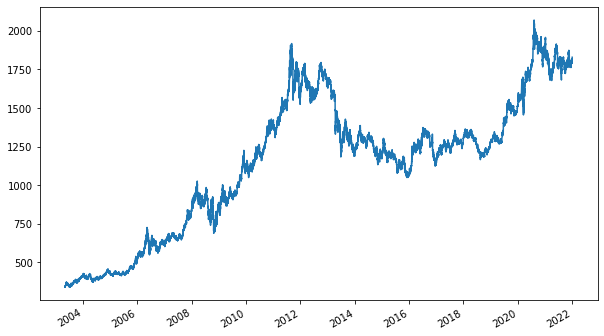

In [ ]:
data['Close'].plot()

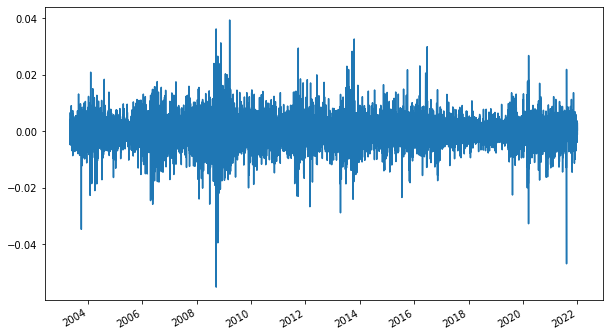

In [ ]:
data['Returns'].plot()

In [ ]:
data_open = data['Open']
data_high = data['High']
data_low = data['Low']
data_close = data['Close']
data_volume = data['Volume']
#data_close

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

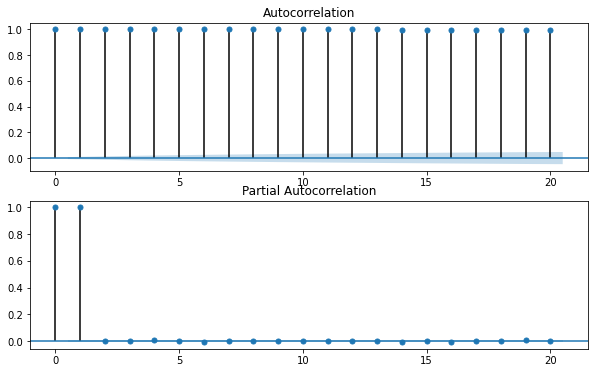

In [ ]:
n_lag = 20
sig_lv = 0.05
fig, ax = plt.subplots(2, 1)
plot_acf(data_open, ax=ax[0], lags=n_lag, alpha=sig_lv)
plot_pacf(data_open, ax=ax[1],  lags=n_lag, alpha=sig_lv);

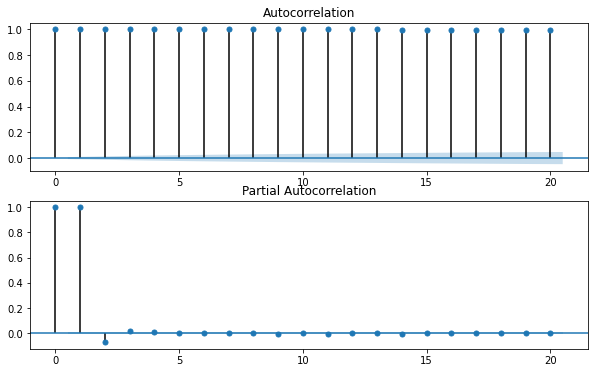

In [ ]:
n_lag = 20
sig_lv = 0.05
fig, ax = plt.subplots(2, 1)
plot_acf(data_high, ax=ax[0], lags=n_lag, alpha=sig_lv)
plot_pacf(data_high, ax=ax[1],  lags=n_lag, alpha=sig_lv);

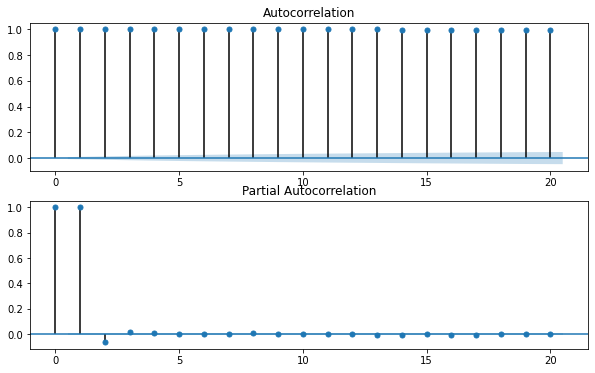

In [ ]:
n_lag = 20
sig_lv = 0.05
fig, ax = plt.subplots(2, 1)
plot_acf(data_low, ax=ax[0], lags=n_lag, alpha=sig_lv)
plot_pacf(data_low, ax=ax[1],  lags=n_lag, alpha=sig_lv);

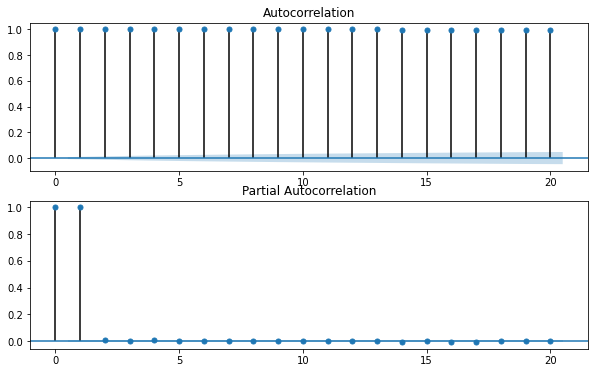

In [ ]:
n_lag = 20
sig_lv = 0.05
fig, ax = plt.subplots(2, 1)
plot_acf(data_close, ax=ax[0], lags=n_lag, alpha=sig_lv)
plot_pacf(data_close, ax=ax[1],  lags=n_lag, alpha=sig_lv);

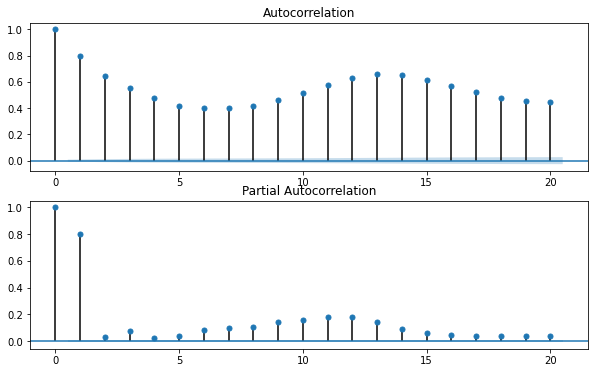

In [ ]:
n_lag = 20
sig_lv = 0.05
fig, ax = plt.subplots(2, 1)
plot_acf(data_volume, ax=ax[0], lags=n_lag, alpha=sig_lv)
plot_pacf(data_volume, ax=ax[1],  lags=n_lag, alpha=sig_lv);

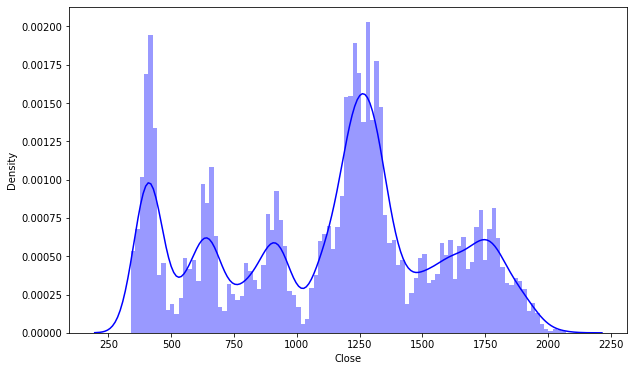

In [ ]:
sns.distplot(data['Close'], color = 'blue', bins = 100)

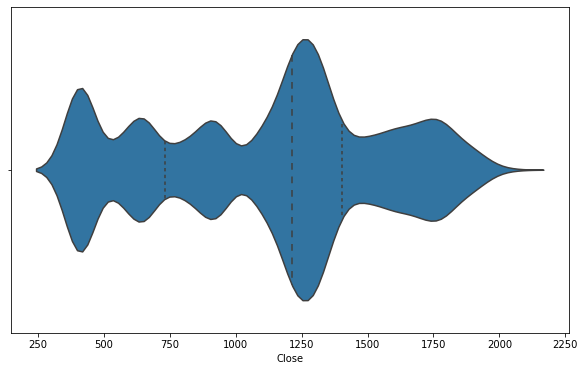

In [ ]:
sns.violinplot(data['Close'],inner="quartile")

In [ ]:
data.index.name = 'DateTime'
data

,Open,High,Low,Close,Volume,Returns
DateTime,,,,,,
2003-05-05 09:00:00,340.429,340.538,339.849,340.092,0.086730,0.000532
2003-05-05 11:00:00,339.748,341.106,339.748,340.608,0.080240,0.001516
2003-05-05 12:00:00,340.754,341.310,340.443,341.080,0.089664,0.001385
2003-05-05 16:00:00,340.907,341.394,340.512,341.052,0.775276,-0.000082
2003-05-05 19:00:00,341.496,342.588,341.231,341.964,0.832870,0.002671
...,...,...,...,...,...,...
2021-12-31 15:00:00,1818.828,1827.404,1818.808,1824.204,2.139520,0.002968
2021-12-31 17:00:00,1822.314,1824.198,1820.184,1821.938,2.017260,-0.001243
2021-12-31 18:00:00,1821.958,1825.739,1821.448,1825.184,1.636060,0.001780


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67065 entries, 2003-05-05 09:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     67065 non-null  float64
 1   High     67065 non-null  float64
 2   Low      67065 non-null  float64
 3   Close    67065 non-null  float64
 4   Volume   67065 non-null  float64
 5   Returns  67065 non-null  float64
dtypes: float64(6)
memory usage: 3.6 MB


## **Feature Preparation**

In [ ]:
import ta
def feature_preparation(df):
    """ Create new variables"""
    
    # We copy the dataframe to avoid interferences in the data
    df_copy = df.copy()
    
    # Create the returns
    #df_copy["returns"] = df_copy["Close"].pct_change(1)

    # Create the SMAs
    df_copy["SMA 15"] = df_copy[["Close"]].rolling(15).mean().shift(1)
    df_copy["SMA 60"] = df_copy[["Close"]].rolling(60).mean().shift(1)
    
    # Create the volatilities
    df_copy["MSD 10"] = df_copy[["Returns"]].rolling(10).std().shift(1)
    df_copy["MSD 30"] = df_copy[["Returns"]].rolling(30).std().shift(1)
    
    # Create the Rsi
    RSI = ta.momentum.RSIIndicator(df_copy["Close"], window= 14, fillna = False)
    df_copy["rsi"] = RSI.rsi().shift(1)
    
    return df_copy.dropna()

In [ ]:
df = feature_preparation(data)
df

,Open,High,Low,Close,Volume,Returns,SMA 15,SMA 60,MSD 10,MSD 30,rsi
DateTime,,,,,,,,,,,
2003-05-09 16:00:00,347.531,348.054,346.385,347.060,0.711190,-0.002371,346.583067,343.009800,0.002282,0.002366,66.620417
2003-05-09 17:00:00,347.236,347.875,346.959,347.806,0.051118,0.002147,346.780000,343.125933,0.002275,0.002415,60.542391
2003-05-09 19:00:00,347.310,348.042,347.043,347.614,0.046213,-0.000552,346.982800,343.245900,0.002351,0.002341,63.765492
2003-05-09 21:00:00,347.623,348.348,347.231,347.737,0.047142,0.000354,347.134267,343.354800,0.002178,0.002127,62.353758
2003-05-12 03:00:00,348.163,348.704,347.802,348.178,0.125610,0.001267,347.249867,343.466217,0.002170,0.002080,62.920120
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 15:00:00,1818.828,1827.404,1818.808,1824.204,2.139520,0.002968,1812.596400,1808.080733,0.001443,0.001648,65.112976
2021-12-31 17:00:00,1822.314,1824.198,1820.184,1821.938,2.017260,-0.001243,1814.209467,1808.363167,0.001331,0.001696,71.001676
2021-12-31 18:00:00,1821.958,1825.739,1821.448,1825.184,1.636060,0.001780,1815.507400,1808.682383,0.001353,0.001706,65.974757


# **Deep Multilayer Perceptron (DMLP) modeling**

## **Create Traning and Test data sets**

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Returns', 'SMA 15', 'SMA 60',
       'MSD 10', 'MSD 30', 'rsi'],
      dtype='object')

In [ ]:
# Percentage train set
split = int(0.8*len(df))


# Train set creation
X_train = df[["SMA 15", "SMA 60", "MSD 10", "MSD 30", "rsi"]].iloc[:split,:]
y_train = df[["Returns"]].iloc[:split,:]


# Test set creation
X_test = df[["SMA 15", "SMA 60", "MSD 10", "MSD 30", "rsi"]].iloc[split:,:]
y_test = df[["Returns"]].iloc[split:,:]


## **Data Rescaling**

In [ ]:
# STANDARDIZATION
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## **DMLP Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# LIBAIRIES
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nb_hidden_layer = 2


# INTIALIZATION SEQUENTIAL MODEL
regressor = Sequential()

# FIRST LAYER
regressor.add(Dense(25, input_shape=(X_train_sc.shape[1],), activation="relu"))

# ADD HIDDEN LAYER
for i in range(1,nb_hidden_layer):
  regressor.add(Dense(int(25/i), activation="relu"))


# OUTPUT LAYER DENSE
regressor.add(Dense(1, activation="linear"))

# COMPILE THE MODEL
regressor.compile(loss="mse", optimizer="adam")

early_stop = EarlyStopping(verbose=1, patience = 5)

regressor.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100, callbacks=[early_stop])

Epoch 1/100
1676/1676 [==============================] - 10s 6ms/step - loss: 5.7036e-04 - val_loss: 6.1542e-05
Epoch 2/100
1676/1676 [==============================] - 7s 4ms/step - loss: 3.7319e-05 - val_loss: 2.5582e-05
Epoch 3/100
1676/1676 [==============================] - 5s 3ms/step - loss: 2.1838e-05 - val_loss: 1.6707e-05
Epoch 4/100
1676/1676 [==============================] - 4s 3ms/step - loss: 1.7073e-05 - val_loss: 1.3921e-05
Epoch 5/100
1676/1676 [==============================] - 4s 3ms/step - loss: 1.4260e-05 - val_loss: 1.7935e-05
Epoch 6/100
1676/1676 [==============================] - 4s 3ms/step - loss: 1.2305e-05 - val_loss: 9.8690e-06
Epoch 7/100
1676/1676 [==============================] - 5s 3ms/step - loss: 1.1312e-05 - val_loss: 8.4251e-06
Epoch 8/100
1676/1676 [==============================] - 5s 3ms/step - loss: 1.0403e-05 - val_loss: 9.2795e-06
Epoch 9/100
1676/1676 [==============================] - 4s 3ms/step - loss: 9.8823e-06 - val_loss: 8.6730e-06


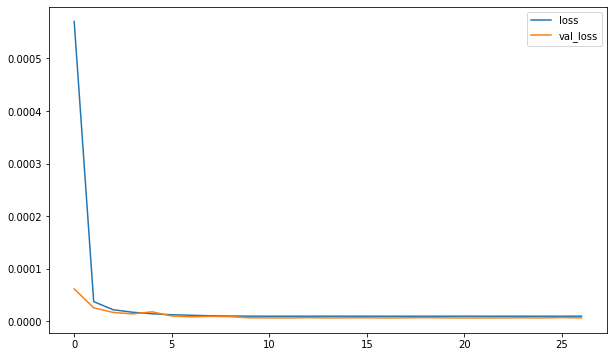

In [ ]:
pd.DataFrame(regressor.history.history).plot()

# **Model Evaluation**

In [ ]:
# Create predictions for the whole dataset
df["prediction"] = regressor.predict(np.concatenate((X_train_sc,X_test_sc), axis=0))

# Compute the strategy
df["strategy"] = df["Returns"] * np.sign(df["prediction"].shift(1))

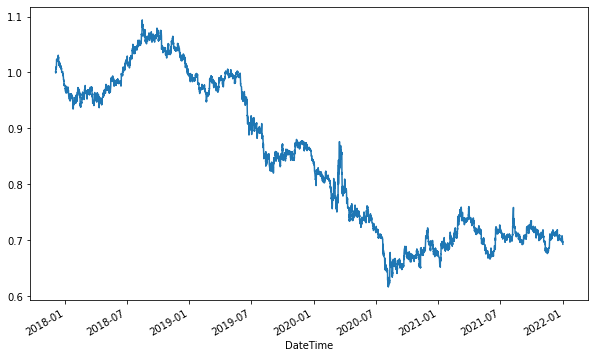

In [ ]:
df["strategy"].iloc[split:].cumsum().apply(np.exp).plot()

# **Automization**


In [ ]:
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
def feature_preparation(df):
    """ Create new variables"""
    
    # We copy the dataframe to avoid interferences in the data
    df_copy = df.copy()
    
    # Create the returns
    df_copy["Returns"] = df_copy["close"].pct_change(1)

    # Create the SMAs
    df_copy["SMA 15"] = df_copy[["close"]].rolling(15).mean().shift(1)
    df_copy["SMA 60"] = df_copy[["close"]].rolling(60).mean().shift(1)
    
    # Create the volatilities
    df_copy["MSD 10"] = df_copy[["Returns"]].rolling(10).std().shift(1)
    df_copy["MSD 30"] = df_copy[["Returns"]].rolling(30).std().shift(1)
    
    # Create the Rsi
    RSI = ta.momentum.RSIIndicator(df_copy["close"], window= 14, fillna = False)
    df_copy["rsi"] = RSI.rsi().shift(1)
    
    return df_copy.dropna()

def preprocessing(file_path):

    file_path = glob.glob("/gdrive/My Drive/Data/Forex/XAUUSD1h2001-2021.csv")
    #Import the data
    #df = yf.download(symbol).dropna()
    #symbol
    #drive.mount('/gdrive')
    #file_path = glob.glob(file_path) 
    for file in file_path:
      df = pd.read_csv(file)
    df.loc[:,'DateTime'] = pd.to_datetime(df.Date.astype(str)+' '+df.Timestamp.astype(str))
    df.drop(columns = ['Date','Timestamp'], inplace = True)
    df.set_index('DateTime', inplace = True)
  
  #Rename
    df.columns = ["open", "high", "low", "close", "volume"]
    df.index.name = "time"

  # Remove adj close
  # del df["adj close"]

    return df

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

def DNN(file_path, nb_neurons=25, nb_hidden_layer=2, nb_model=None):

  # Features engineering
  df = preprocessing(file_path)
  dfc = feature_preparation(df)

  # Percentage train set
  split = int(0.8*len(dfc))
  split_val = int(0.9*len(dfc))

  # Train set creation
  X_train = dfc[['SMA 15', 'SMA 60',
        'MSD 10', 'MSD 30', 'rsi']].iloc[:split,:]
  y_train = dfc[["Returns"]].iloc[:split]


  # Test set creation
  X_test = dfc[['SMA 15', 'SMA 60',
        'MSD 10', 'MSD 30', 'rsi']].iloc[split:,:]
  y_test = dfc[["Returns"]].iloc[split:]
  

  # STANDARDISATION
  from sklearn.preprocessing import StandardScaler

  sc = StandardScaler()

  X_train_sc = sc.fit_transform(X_train)
  X_test_sc = sc.transform(X_test)


  # INTIALIZATION SEQUENTIAL MODEL
  regressor = Sequential()

  # FIRST LAYER
  regressor.add(Dense(25, input_shape=(X_train_sc.shape[1],), activation="relu"))

  # ADD HIDDEN LAYER
  for i in range(1,nb_hidden_layer):
    regressor.add(Dense(int(25/i), activation="relu"))


  # OUTPUT LAYER DENSE
  regressor.add(Dense(1, activation="linear"))

  # COMPILE THE MODEL
  regressor.compile(loss="mse", optimizer="adam")

  early_stop = EarlyStopping(verbose=1, patience = 5)

  regressor.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100, callbacks=[early_stop])

  # Create predictions for the whole dataset
  dfc["prediction"] = regressor.predict(np.concatenate((X_train_sc,X_test_sc),
                                      axis=0))

  # Compute the strategy
  dfc["strategy"] = np.sign(dfc["prediction"].shift(1)) * dfc["Returns"]

  dfc["return"] = dfc["strategy"]

  if nb_model!=None:
    regressor.save_weights(f"Weights_DNN/DNN n°{nb_model}")
    return dfc["strategy"].iloc[split:split_val], dfc["strategy"].iloc[split_val:]

  else:
      return dfc["strategy"].iloc[split:split_val], dfc["strategy"].iloc[split_val:]

In [ ]:
sr = DNN(file_path, nb_model=10)

sr

Epoch 1/100
2841/2841 [==============================] - 10s 3ms/step - loss: 3.4789e-04 - val_loss: 2.9369e-05
Epoch 2/100
2841/2841 [==============================] - 7s 3ms/step - loss: 2.6320e-05 - val_loss: 1.3589e-05
Epoch 3/100
2841/2841 [==============================] - 8s 3ms/step - loss: 1.5559e-05 - val_loss: 9.9696e-06
Epoch 4/100
2841/2841 [==============================] - 8s 3ms/step - loss: 1.1557e-05 - val_loss: 4.7505e-06
Epoch 5/100
2841/2841 [==============================] - 8s 3ms/step - loss: 8.9776e-06 - val_loss: 7.2640e-06
Epoch 6/100
2841/2841 [==============================] - 7s 3ms/step - loss: 7.6430e-06 - val_loss: 4.2056e-06
Epoch 7/100
2841/2841 [==============================] - 7s 3ms/step - loss: 6.7300e-06 - val_loss: 4.2252e-06
Epoch 8/100
2841/2841 [==============================] - 7s 3ms/step - loss: 6.0797e-06 - val_loss: 3.5947e-06
Epoch 9/100
2841/2841 [==============================] - 8s 3ms/step - loss: 5.8909e-06 - val_loss: 3.8049e-06


(time
 2018-02-27 10:00:00   -0.000135
 2018-02-27 11:00:00    0.000090
 2018-02-27 12:00:00   -0.000859
 2018-02-27 13:00:00   -0.000120
 2018-02-27 14:00:00   -0.000048
                          ...   
 2020-01-30 10:00:00   -0.000563
 2020-01-30 11:00:00   -0.000443
 2020-01-30 12:00:00    0.000158
 2020-01-30 13:00:00   -0.000184
 2020-01-30 14:00:00    0.000519
 Name: strategy, Length: 11364, dtype: float64, time
 2020-01-30 15:00:00   -0.001341
 2020-01-30 16:00:00   -0.000366
 2020-01-30 17:00:00    0.003502
 2020-01-30 18:00:00   -0.001558
 2020-01-30 19:00:00    0.002326
                          ...   
 2021-12-31 19:00:00    0.000690
 2021-12-31 20:00:00    0.000986
 2021-12-31 21:00:00   -0.000567
 2021-12-31 22:00:00    0.001122
 2021-12-31 23:00:00   -0.000109
 Name: strategy, Length: 11364, dtype: float64)

In [ ]:
# Library to estimate the time until the end of the loop
from tqdm import tqdm

# Empty lists to contain the returns
returns_test = []
returns_val = []


# Compute the returns during the test and validation periods
for i in tqdm(range(10)):
  test, val = DNN(file_path, nb_model=i)
  returns_test.append(test)
  returns_val.append(val)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/100
2841/2841 [==============================] - 8s 3ms/step - loss: 4.9336e-04 - val_loss: 4.6376e-05
Epoch 2/100
2841/2841 [==============================] - 7s 3ms/step - loss: 3.9638e-05 - val_loss: 2.6397e-05
Epoch 3/100
2841/2841 [==============================] - 7s 3ms/step - loss: 2.2349e-05 - val_loss: 9.7231e-06
Epoch 4/100
2841/2841 [==============================] - 7s 3ms/step - loss: 1.4937e-05 - val_loss: 7.1940e-06
Epoch 5/100
2841/2841 [==============================] - 8s 3ms/step - loss: 1.0860e-05 - val_loss: 7.7167e-06
Epoch 6/100
2841/2841 [==============================] - 8s 3ms/step - loss: 8.0321e-06 - val_loss: 5.0940e-06
Epoch 7/100
2841/2841 [==============================] - 8s 3ms/step - loss: 6.3523e-06 - val_loss: 3.7925e-06
Epoch 8/100
2841/2841 [==============================] - 7s 3ms/step - loss: 5.8014e-06 - val_loss: 3.6354e-06
Epoch 9/100
2841/2841 [==============================] - 8s 3ms/step - loss: 5.7499e-06 - val_loss: 3.8111e-06
E

 10%|█         | 1/10 [02:27<22:10, 147.79s/it]

Epoch 1/100
2841/2841 [==============================] - 8s 3ms/step - loss: 0.0035 - val_loss: 9.1380e-05
Epoch 2/100
2841/2841 [==============================] - 8s 3ms/step - loss: 4.7097e-05 - val_loss: 4.3501e-05
Epoch 3/100
2841/2841 [==============================] - 7s 3ms/step - loss: 3.5515e-05 - val_loss: 3.4745e-05
Epoch 4/100
2841/2841 [==============================] - 7s 3ms/step - loss: 2.3321e-05 - val_loss: 2.1588e-05
Epoch 5/100
2841/2841 [==============================] - 8s 3ms/step - loss: 1.4144e-05 - val_loss: 6.3410e-06
Epoch 6/100
2841/2841 [==============================] - 7s 3ms/step - loss: 1.1797e-05 - val_loss: 4.4871e-06
Epoch 7/100
2841/2841 [==============================] - 7s 3ms/step - loss: 8.2282e-06 - val_loss: 4.3133e-06
Epoch 8/100
2841/2841 [==============================] - 9s 3ms/step - loss: 7.0353e-06 - val_loss: 4.5557e-06
Epoch 9/100
2841/2841 [==============================] - 7s 3ms/step - loss: 6.3138e-06 - val_loss: 5.3678e-06
Epoch

 20%|██        | 2/10 [04:48<19:07, 143.45s/it]

Epoch 1/100
2841/2841 [==============================] - 11s 4ms/step - loss: 2.3625e-04 - val_loss: 3.1314e-05
Epoch 2/100
2841/2841 [==============================] - 9s 3ms/step - loss: 2.6797e-05 - val_loss: 1.2835e-05
Epoch 3/100
2841/2841 [==============================] - 9s 3ms/step - loss: 1.4353e-05 - val_loss: 2.1139e-05
Epoch 4/100
2841/2841 [==============================] - 8s 3ms/step - loss: 1.0234e-05 - val_loss: 6.1471e-06
Epoch 5/100
2841/2841 [==============================] - 11s 4ms/step - loss: 8.1418e-06 - val_loss: 7.3464e-06
Epoch 6/100
2841/2841 [==============================] - 9s 3ms/step - loss: 6.5843e-06 - val_loss: 3.9402e-06
Epoch 7/100
2841/2841 [==============================] - 9s 3ms/step - loss: 6.0416e-06 - val_loss: 3.7022e-06
Epoch 8/100
2841/2841 [==============================] - 8s 3ms/step - loss: 5.9326e-06 - val_loss: 3.8811e-06
Epoch 9/100
2841/2841 [==============================] - 9s 3ms/step - loss: 5.8263e-06 - val_loss: 3.6203e-06

 30%|███       | 3/10 [09:00<22:32, 193.15s/it]

Epoch 1/100
2841/2841 [==============================] - 11s 4ms/step - loss: 9.1538e-04 - val_loss: 9.8743e-05
Epoch 2/100
2841/2841 [==============================] - 12s 4ms/step - loss: 5.3030e-05 - val_loss: 3.6675e-05
Epoch 3/100
2841/2841 [==============================] - 9s 3ms/step - loss: 3.0656e-05 - val_loss: 5.2539e-05
Epoch 4/100
2841/2841 [==============================] - 8s 3ms/step - loss: 1.9334e-05 - val_loss: 1.3321e-05
Epoch 5/100
2841/2841 [==============================] - 8s 3ms/step - loss: 1.2985e-05 - val_loss: 1.4461e-05
Epoch 6/100
2841/2841 [==============================] - 8s 3ms/step - loss: 9.9710e-06 - val_loss: 9.5843e-06
Epoch 7/100
2841/2841 [==============================] - 10s 3ms/step - loss: 8.0821e-06 - val_loss: 5.3840e-06
Epoch 8/100
2841/2841 [==============================] - 13s 4ms/step - loss: 6.9924e-06 - val_loss: 4.2928e-06
Epoch 9/100
2841/2841 [==============================] - 13s 5ms/step - loss: 6.4413e-06 - val_loss: 7.5671e

 40%|████      | 4/10 [12:28<19:54, 199.02s/it]

Epoch 1/100
2841/2841 [==============================] - 9s 3ms/step - loss: 0.0016 - val_loss: 5.8554e-05
Epoch 2/100
2841/2841 [==============================] - 8s 3ms/step - loss: 4.5362e-05 - val_loss: 2.7449e-05
Epoch 3/100
2841/2841 [==============================] - 9s 3ms/step - loss: 2.4922e-05 - val_loss: 1.2493e-05
Epoch 4/100
2841/2841 [==============================] - 8s 3ms/step - loss: 1.5355e-05 - val_loss: 1.0061e-05
Epoch 5/100
2841/2841 [==============================] - 8s 3ms/step - loss: 1.2424e-05 - val_loss: 7.9036e-06
Epoch 6/100
2841/2841 [==============================] - 8s 3ms/step - loss: 9.1336e-06 - val_loss: 4.7661e-06
Epoch 7/100
2841/2841 [==============================] - 8s 3ms/step - loss: 7.4236e-06 - val_loss: 3.7962e-06
Epoch 8/100
2841/2841 [==============================] - 7s 3ms/step - loss: 6.5882e-06 - val_loss: 3.9319e-06
Epoch 9/100
2841/2841 [==============================] - 7s 3ms/step - loss: 6.1248e-06 - val_loss: 3.8424e-06
Epoch

 50%|█████     | 5/10 [14:56<15:02, 180.54s/it]

Epoch 1/100
2841/2841 [==============================] - 8s 3ms/step - loss: 5.5923e-04 - val_loss: 8.3568e-05
Epoch 2/100
2841/2841 [==============================] - 8s 3ms/step - loss: 8.4214e-05 - val_loss: 2.8198e-05
Epoch 3/100
2841/2841 [==============================] - 7s 3ms/step - loss: 5.2697e-05 - val_loss: 8.2862e-05
Epoch 4/100
2841/2841 [==============================] - 8s 3ms/step - loss: 2.4088e-05 - val_loss: 6.6992e-05
Epoch 5/100
2841/2841 [==============================] - 8s 3ms/step - loss: 1.6351e-05 - val_loss: 6.1667e-06
Epoch 6/100
2841/2841 [==============================] - 8s 3ms/step - loss: 1.1672e-05 - val_loss: 6.6143e-06
Epoch 7/100
2841/2841 [==============================] - 7s 3ms/step - loss: 8.3306e-06 - val_loss: 1.1437e-05
Epoch 8/100
2841/2841 [==============================] - 8s 3ms/step - loss: 6.7689e-06 - val_loss: 3.7637e-06
Epoch 9/100
2841/2841 [==============================] - 7s 3ms/step - loss: 6.0305e-06 - val_loss: 3.8503e-06
E

 60%|██████    | 6/10 [17:02<10:48, 162.20s/it]

Epoch 1/100
2841/2841 [==============================] - 8s 3ms/step - loss: 3.5619e-04 - val_loss: 5.1236e-05
Epoch 2/100
2841/2841 [==============================] - 8s 3ms/step - loss: 2.4721e-05 - val_loss: 1.3657e-05
Epoch 3/100
2841/2841 [==============================] - 8s 3ms/step - loss: 1.5364e-05 - val_loss: 1.1153e-05
Epoch 4/100
2841/2841 [==============================] - 8s 3ms/step - loss: 1.0893e-05 - val_loss: 5.0427e-06
Epoch 5/100
2841/2841 [==============================] - 8s 3ms/step - loss: 8.5916e-06 - val_loss: 7.4177e-06
Epoch 6/100
2841/2841 [==============================] - 7s 3ms/step - loss: 7.0786e-06 - val_loss: 3.9203e-06
Epoch 7/100
2841/2841 [==============================] - 8s 3ms/step - loss: 6.1556e-06 - val_loss: 4.1541e-06
Epoch 8/100
2841/2841 [==============================] - 8s 3ms/step - loss: 5.7985e-06 - val_loss: 3.5865e-06
Epoch 9/100
2841/2841 [==============================] - 7s 3ms/step - loss: 5.7477e-06 - val_loss: 3.5777e-06
E

 70%|███████   | 7/10 [19:02<07:24, 148.27s/it]

Epoch 1/100
2841/2841 [==============================] - 8s 3ms/step - loss: 7.3765e-04 - val_loss: 4.6695e-05
Epoch 2/100
2841/2841 [==============================] - 7s 3ms/step - loss: 4.1940e-05 - val_loss: 4.1564e-05
Epoch 3/100
2841/2841 [==============================] - 8s 3ms/step - loss: 2.3151e-05 - val_loss: 3.6918e-05
Epoch 4/100
2841/2841 [==============================] - 8s 3ms/step - loss: 1.5857e-05 - val_loss: 9.0547e-06
Epoch 5/100
2841/2841 [==============================] - 7s 3ms/step - loss: 1.1733e-05 - val_loss: 6.2570e-06
Epoch 6/100
2841/2841 [==============================] - 8s 3ms/step - loss: 8.8476e-06 - val_loss: 7.3192e-06
Epoch 7/100
2841/2841 [==============================] - 8s 3ms/step - loss: 6.6515e-06 - val_loss: 4.8861e-06
Epoch 8/100
2841/2841 [==============================] - 7s 3ms/step - loss: 6.2010e-06 - val_loss: 3.6492e-06
Epoch 9/100
2841/2841 [==============================] - 8s 3ms/step - loss: 6.1427e-06 - val_loss: 3.9362e-06
E

 80%|████████  | 8/10 [21:23<04:52, 146.06s/it]

Epoch 1/100
2841/2841 [==============================] - 8s 3ms/step - loss: 9.3711e-04 - val_loss: 5.2497e-05
Epoch 2/100
2841/2841 [==============================] - 7s 3ms/step - loss: 4.9636e-05 - val_loss: 2.5290e-05
Epoch 3/100
2841/2841 [==============================] - 8s 3ms/step - loss: 4.1396e-05 - val_loss: 9.1116e-06
Epoch 4/100
2841/2841 [==============================] - 8s 3ms/step - loss: 2.5928e-05 - val_loss: 8.9774e-06
Epoch 5/100
2841/2841 [==============================] - 8s 3ms/step - loss: 1.8123e-05 - val_loss: 6.9558e-06
Epoch 6/100
2841/2841 [==============================] - 7s 3ms/step - loss: 1.2247e-05 - val_loss: 4.8328e-06
Epoch 7/100
2841/2841 [==============================] - 8s 3ms/step - loss: 1.1997e-05 - val_loss: 4.2406e-06
Epoch 8/100
2841/2841 [==============================] - 8s 3ms/step - loss: 7.9173e-06 - val_loss: 4.6146e-06
Epoch 9/100
2841/2841 [==============================] - 8s 3ms/step - loss: 7.0304e-06 - val_loss: 4.0749e-06
E

 90%|█████████ | 9/10 [23:50<02:26, 146.22s/it]

Epoch 1/100
2841/2841 [==============================] - 8s 3ms/step - loss: 0.0012 - val_loss: 1.5778e-04
Epoch 2/100
2841/2841 [==============================] - 7s 3ms/step - loss: 4.3558e-05 - val_loss: 3.5606e-05
Epoch 3/100
2841/2841 [==============================] - 7s 3ms/step - loss: 2.4508e-05 - val_loss: 3.0697e-05
Epoch 4/100
2841/2841 [==============================] - 7s 3ms/step - loss: 1.6462e-05 - val_loss: 1.5310e-05
Epoch 5/100
2841/2841 [==============================] - 8s 3ms/step - loss: 1.2048e-05 - val_loss: 7.3660e-06
Epoch 6/100
2841/2841 [==============================] - 7s 3ms/step - loss: 9.0532e-06 - val_loss: 1.1426e-05
Epoch 7/100
2841/2841 [==============================] - 8s 3ms/step - loss: 7.2456e-06 - val_loss: 7.3645e-06
Epoch 8/100
2841/2841 [==============================] - 8s 3ms/step - loss: 6.4704e-06 - val_loss: 8.7983e-06
Epoch 9/100
2841/2841 [==============================] - 7s 3ms/step - loss: 6.0580e-06 - val_loss: 3.7009e-06
Epoch

100%|██████████| 10/10 [26:16<00:00, 157.69s/it]


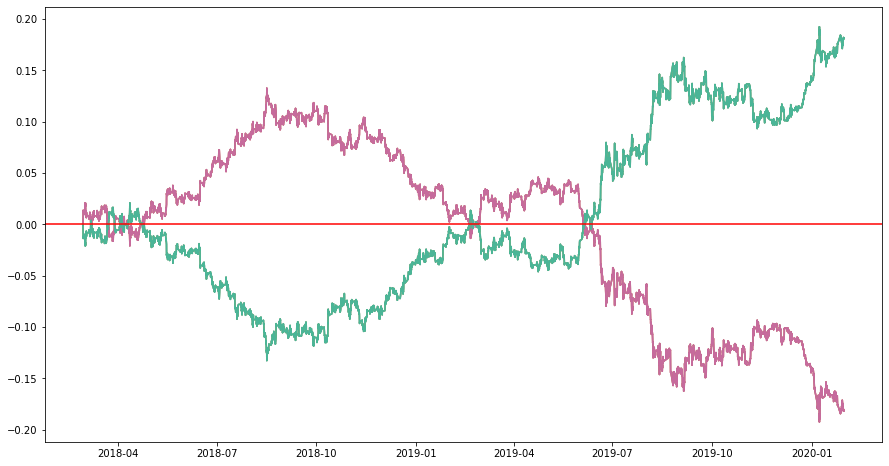

In [ ]:
""" IT IS NOT A MONTE CARLO SIMULATION """

# Organize well all the data
DNN_returns = pd.DataFrame(returns_test, index=[f"DNN n°{i}" for i in range(len(returns_test))]).transpose()

# Adapt the size of the graph
plt.figure(figsize=(15,8))

# Plot the returns
plt.plot(DNN_returns.cumsum(axis=0), alpha=0.6)

# Plot break-even line
plt.axhline(0, color="red")

# show the graph
plt.show()

In [ ]:
def drawdown_function(serie):

  # We compute Cumsum of the returns
  cum = serie.dropna().cumsum() + 1

  # We compute max of the cumsum on the period (accumulate max) # (1,3,5,3,1) --> (1,3,5,5,5)
  running_max = np.maximum.accumulate(cum)

  # We compute drawdown
  drawdown = cum/running_max - 1
  return drawdown

In [ ]:
# Create empty dataframe
values = pd.DataFrame(index=["ret/dd", "ret", "dd"])

# Compute return and max drawdawn for each ANN
for col in DNN_returns.columns:

  # Compute the returns and the max drawdown for one ANN
  ret, dd = DNN_returns[col].cumsum().iloc[-1], -np.min(drawdown_function(DNN_returns[col]))

  # Create a column containing the ret/dd ratio, the returns and the drawdown
  values[col] = ret/dd, ret, dd

In [ ]:
values.transpose().sort_values(by="ret/dd", ascending=False)

,ret/dd,ret,dd
DNN n°0,1.205653,0.181438,0.150489
DNN n°2,1.205653,0.181438,0.150489
DNN n°7,1.205653,0.181438,0.150489
DNN n°8,1.205653,0.181438,0.150489
DNN n°9,1.205653,0.181438,0.150489
DNN n°1,-0.632222,-0.181438,0.286984
DNN n°3,-0.632222,-0.181438,0.286984
DNN n°4,-0.632222,-0.181438,0.286984
DNN n°5,-0.632222,-0.181438,0.286984
DNN n°6,-0.632222,-0.181438,0.286984


In [ ]:
DNN_models = list(values.transpose().sort_values(by="ret/dd", ascending=False).index[0:3])
DNN_models

['DNN n°0', 'DNN n°2', 'DNN n°7']

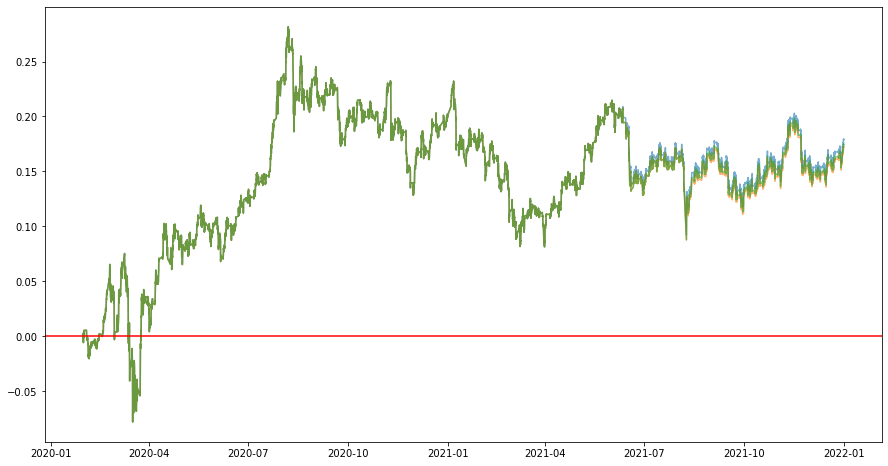

In [ ]:
""" Use the 3best models on the test set to trade on the validation set"""

# Organize the data 
DNN_val = pd.DataFrame(returns_val, index=[f"DNN n°{i}" for i in range(len(returns_val))]).transpose()

# Adapt the size
plt.figure(figsize=(15,8))

# Plot the portfolio method containing the 10 best strategies
plt.plot(DNN_val[DNN_models].cumsum(axis=0), alpha=0.6)

plt.axhline(0, color="red")

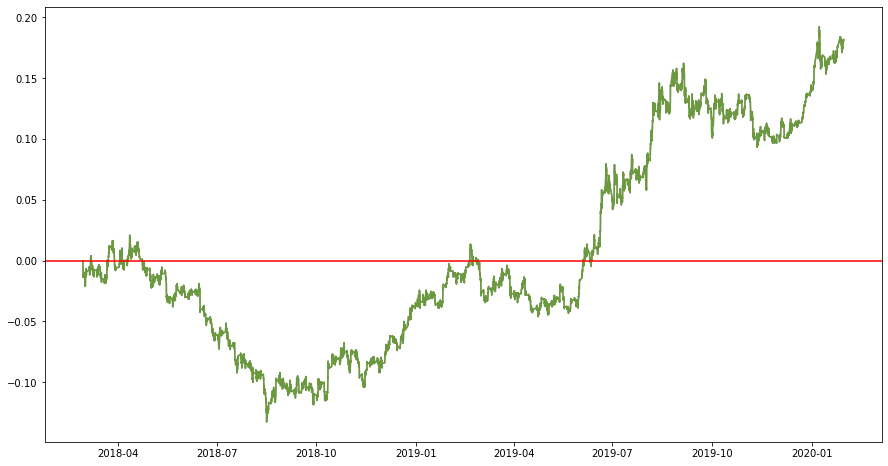

In [ ]:
""" Use the 3best models on the test set to trade on the test set"""

# Organize the data 
DNN_val = pd.DataFrame(returns_val, index=[f"DNN n°{i}" for i in range(len(returns_val))]).transpose()

# Adapt the size
plt.figure(figsize=(15,8))

# Plot the portfolio method containing the 10 best strategies
plt.plot(DNN_returns[DNN_models].cumsum(axis=0), alpha=0.6)

plt.axhline(0, color="red")

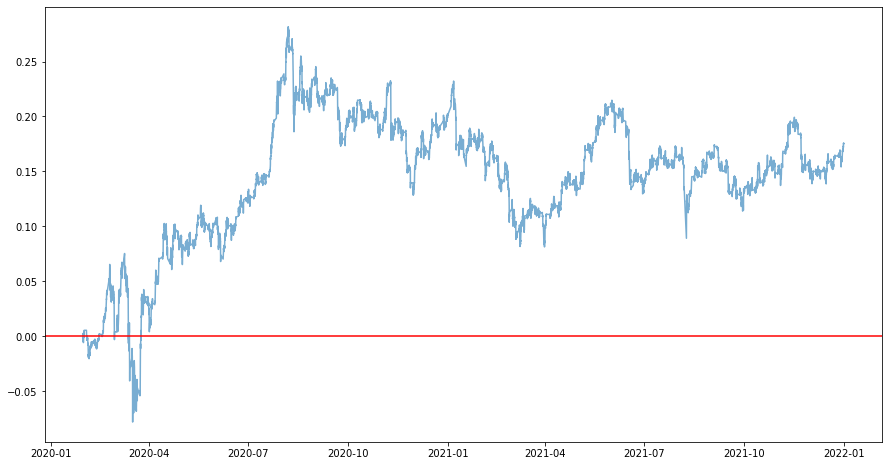

In [ ]:
""" Strategy created """
# Adapt the size
plt.figure(figsize=(15,8))

# Plot the portfolio method containing the 10 best strategies
plt.plot(DNN_val[DNN_models].sum(axis=1).cumsum(axis=0)/3, alpha=0.6)
plt.axhline(0, color="red")

# **Bagging method**

In [ ]:
def DNN_weights():
  nb_hidden_layer=2
  # INTIALIZATION SEQUENTIAL MODEL
  regressor = Sequential()

  # FIRST LAYER
  regressor.add(Dense(25, input_shape=(X_train_sc.shape[1],), activation="relu"))

  # ADD HIDDEN LAYER
  for i in range(1,nb_hidden_layer):
    regressor.add(Dense(int(25/i), activation="relu"))

  # OUTPUT LAYER DENSE
  regressor.add(Dense(1, activation="linear"))

  # COMPILE THE MODEL
  regressor.compile(loss="mse", optimizer="adam")

  return regressor

In [ ]:
# Create empty dataframe
prediction = pd.DataFrame(index = dfc.index)
for nb in DNN_models:

  # Create ANN structure
  ann = DNN_weights()

  # Import trained weights
  ann.load_weights(f"Weights_DNN/{nb}")

  # Create predictions for the whole dataset
  pre = ann.predict(np.concatenate((X_train_sc,X_test_sc),
                                        axis=0))
  prediction[f"DNN n°{nb}"] = pre
prediction

NameError: ignored

In [ ]:
prediction["Increase"] = (np.sign(prediction)==1).sum(axis=1)
prediction["Decrease"] = (np.sign(prediction)==-1).sum(axis=1)
prediction

In [ ]:
# Put the daily return of the asset
prediction["returns"] = dfc["returns"]

# Compute the position doing a bagging on the best ANN
prediction["position"] = np.nan
prediction.loc[prediction["Increase"] > prediction["Decrease"], "position"] = 1
prediction.loc[prediction["Increase"] < prediction["Decrease"], "position"] = -1

# When you will run again the code you can have different results
# Compute and plot the strategy return on the validation test
# Very important to put the shift at he position,Don't forget!
prediction["strategy"] = prediction["returns"] * prediction["position"].shift(1)
split, split_val = int(0.85*len(dfc)), int(0.95*len(dfc))
prediction["strategy"].iloc[split_val:].cumsum().plot()

NameError: ignored

In [ ]:
prediction

NameError: ignored